In [1]:
# import matplotlib as mpl
# matplotlib.style.use('fast')
# matplotlib.use('agg')
import logging

# logging.basicConfig(level=logging.WARNING)
logging.basicConfig(level=logging.WARNING)
import shnitsel as st

## Basic datasheet test

In [2]:
from shnitsel.data.shnitsel_db.db_compound_group import CompoundInfo
from shnitsel.data.shnitsel_db_format import ShnitselDB
from shnitsel.data.trajectory_format import Trajectory

shnitsel_db: ShnitselDB = st.io.read('test_data/sharc/traj_I01_v3.0/', parallel=True)  # type: ignore
shnitsel_db_triplet: ShnitselDB = st.io.read(
    'test_data/sharc/traj_I01_v3.0_triplets/', parallel=True
)  # type: ignore
shnitsel_db_full: ShnitselDB = st.io.read(
    'test_data/sharc/traj_I01_v3.0_triplets_nacs_socs/', parallel=True
)  # type: ignore
shnitsel_db.set_compound_info(compound_info=CompoundInfo("I01"), apply_to_all=True)
shnitsel_db_triplet.set_compound_info(
    compound_info=CompoundInfo("I01"), apply_to_all=True
)
shnitsel_db_full.set_compound_info(compound_info=CompoundInfo("I01"), apply_to_all=True)
shnitsel_db_full.set_compound_info(compound_info=CompoundInfo("I01"), apply_to_all=True)


def set_charges(traj: Trajectory):
    return traj.assign(
        state_charges=(
            'state',
            traj.state_charges.values * 0 + 1,
            traj.state_charges.attrs,
        )
    )


shnitsel_db = shnitsel_db.map_over_trajectories(set_charges)  # type: ignore
shnitsel_db_triplet = shnitsel_db_triplet.map_over_trajectories(set_charges)  # type: ignore
shnitsel_db_full = shnitsel_db_full.map_over_trajectories(set_charges)  # type: ignore
# shnitsel_db
shnitsel_db_triplet

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

<xarray.DataTree 'ROOT'>
Group: /
│   Attributes:
│       DataTree_Level:  ShnitselDBRoot
└── Group: /unknown
    │   Attributes:
    │       DataTree_Level:  CompoundGroup
    │       compound_info:   {'compound_name': 'unknown'}
    └── Group: /unknown/0
            Dimensions:                 (time: 201, state: 13, atom: 6, direction: 3,
                                         statecomb: 78, full_statecomb: 156)
            Coordinates: (12/17)
              * time                    (time) float64 2kB 0.0 0.5 1.0 ... 99.0 99.5 100.0
              * state                   (state) int64 104B 1 2 3 4 5 6 7 8 9 10 11 12 13
              * atom                    (atom) int64 48B 0 1 2 3 4 5
              * direction               (direction) <U1 12B 'x' 'y' 'z'
              * statecomb               (statecomb) object 624B MultiIndex
              * full_statecomb          (full_statecomb) object 1kB MultiIndex
                ...                      ...
                atNames                 (atom) <U1 24B 'C' 'N' 'H' 'H' 'H' 'H'
                atNums                  (atom) int64 48B 6 7 1 1 1 1
              * from                    (statecomb) int64 624B 1 1 1 1 1 ... 10 10 11 11 12
              * to                      (statecomb) int64 624B 2 3 4 5 6 ... 12 13 12 13 13
              * full_statecomb_from     (full_statecomb) int64 1kB 1 1 1 1 1 ... 13 13 13 13
              * full_statecomb_to       (full_statecomb) int64 1kB 2 3 4 5 6 ... 9 10 11 12
            Data variables:
                energy                  (time, state) float32 10kB -94.39 -94.06 ... -93.95
                atXYZ                   (time, atom, direction) float32 14kB -0.003343 .....
                dip_perm                (time, state, direction) float32 31kB 0.02128 ......
                dip_trans               (time, statecomb, direction) float32 188kB -0.000...
                socs                    (time, full_statecomb) complex128 502kB 0j ... -1...
                astate                  (time) int32 804B 3 3 3 3 3 3 3 3 ... 1 1 1 1 1 1 1
                sdiag                   (time) int32 804B 12 12 12 9 9 9 9 ... 4 4 1 1 1 1 1
                phases                  (time, state) float32 10kB -1.0 -1.0 ... 1.0 1.0
            Attributes: (12/18)
                input_format:           sharc
                t_max:                  100.0
                delta_t:                0.5
                max_ts:                 201
                completed:              True
                input_type:             dynamic
                ...                     ...
                est_level:              CASSCF
                misc_input_settings:    {'input': {'printlevel': '2', 'geomfile': '"geom"...
                trajectory_input_path:  test_data/sharc/traj_I01_v3.0_triplets/TRAJ_00002
                trajid:                 2
                __original_dataset:     <xarray.Dataset> Size: 766kB\nDimensions:        ...
                DataTree_Level:         TrajectoryData

[18:41:39] WARNING: Proton(s) added/removed



Rendering coupling page for 13 states with at least 78 relevant state transitions.


100%|██████████| 78/78 [00:00<00:00, 513.32it/s]


Saving datasheet as pdf. Please be patient, this may take some time.


Written: 100%|██████████| 1/1 [00:05<00:00,  5.91s/page]

Writing pdf with 3 pages


{'/unknown/aggregate of subtree(unknown)': [<Figure size 827x974.167 with 13 Axes>,
  <Figure size 827x974.167 with 13 Axes>,
  <Figure size 650x650 with 169 Axes>]}

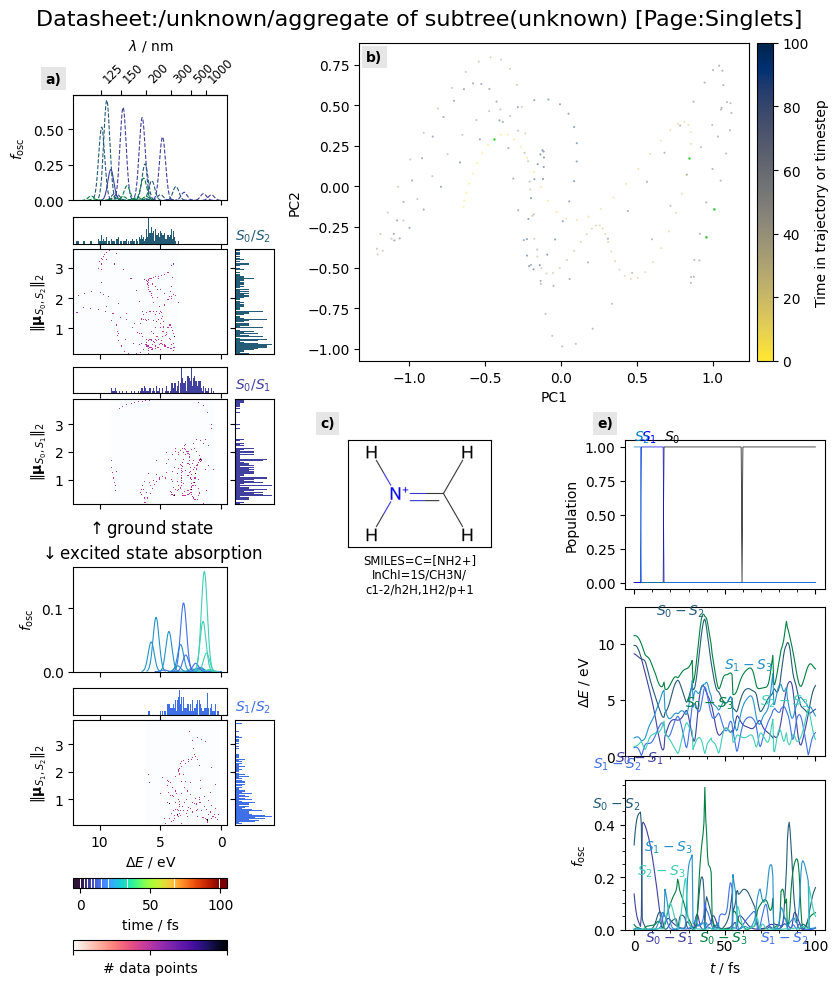

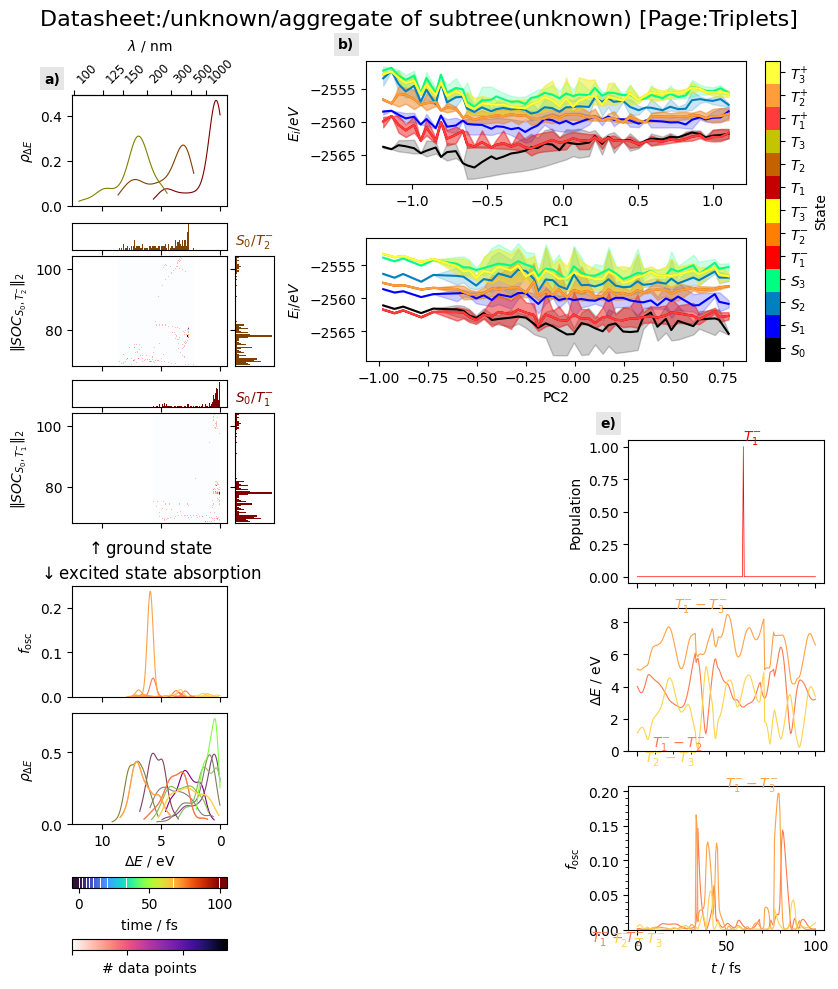

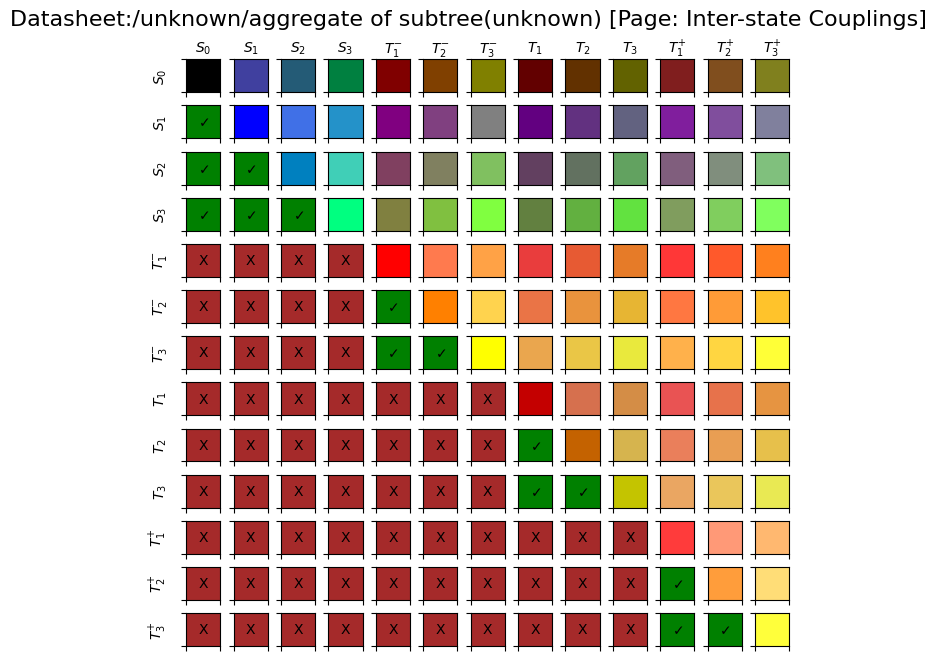

In [3]:
from shnitsel.vis.datasheet import Datasheet

sheet = Datasheet(shnitsel_db_triplet)
# shnitsel_db_triplet
# sheet.datasheet_pages['root'].charge = 1
# sheet.plot(include_pca_page=True, path="./triplet_sharc.pdf")
sheet.plot(path="./triplet_sharc.pdf")
# sheet.datasheet_pages

In [ ]:
sheet = Datasheet(shnitsel_db_full)
# sheet.datasheet_pages['root'].charge = 1
sheet.plot(include_pca_page=True, path="./triplet_sharc_full.pdf")
# sheet.plot( path="./triplet_sharc_full.pdf")
# sheet.datasheet_pages
# sheet.datasheet_pages[list(sheet.datasheet_pages.keys())[0]].per_state

In [ ]:
%time sheet.calc_all()

In [ ]:
%time sheet.plot_per_state_histograms()

In [ ]:
%time sheet.plot_timeplots()

In [ ]:
%time sheet.plot_separated_spectra_and_hists()

In [ ]:
%time fig = sheet.plot()

In [ ]:
# fig.savefig('/tmp/ethene.png')

## Alkene datasheets

In [ ]:
from glob import iglob

for path in iglob('/nc/Theo_SHNITSEL/filtered/*.nc'):
    print(path)

    sheet = sh.plot.Datasheet(path=path)
    sheet.plot()

## Methylenimmonium

In [ ]:
sheet = sh.plot.Datasheet(path='/nc/Theo_SHNITSEL/unfiltered/CH2NH2_time.nc')
sheet.charge = 1
sheet.plot()

## Save all datasheets

In [ ]:
import os

os.mkdir('/tmp/datasheets')
os.chdir('/nc/SHNITSEL_databases/dynamic/')
paths = dict(
    I01='I01_ch2nh2_dynamic.nc',
    A01='A01_ethene_dynamic.nc',
    A02='A02_propene_dynamic.nc',
    A03='A03_butene_dynamic.nc',
    R01a='R01a_chd50_dynamic.nc',
    R01b='R01b_chd25_dynamic.nc',
)
for ref, path in paths.items():
    sheet = sh.plot.Datasheet(path=path)
    fig = sheet.plot()
    fig.set_dpi(400)
    fig.savefig(f'/tmp/datasheets/{ref}.pdf')
    fig.savefig(f'/tmp/datasheets/{ref}.png')